In [3]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = 'C:/Users/JOE/Desktop/task3/mental_health_and_technology_usage_2024.csv'
df = pd.read_csv(file_path)


In [6]:
group_good = df[df['Mental_Health_Status'] == 'Good']['Technology_Usage_Hours']
group_poor = df[df['Mental_Health_Status'] == 'Poor']['Technology_Usage_Hours']

print(f"Good Mental Health Group - Mean Technology Usage: {group_good.mean():.2f} hours")
print(f"Poor Mental Health Group - Mean Technology Usage: {group_poor.mean():.2f} hours")


Good Mental Health Group - Mean Technology Usage: 6.54 hours
Poor Mental Health Group - Mean Technology Usage: 6.57 hours


In [7]:
t_stat, p_value = stats.ttest_ind(group_good, group_poor)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -0.3778
P-value: 0.7056


In [8]:
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference in technology usage between the groups.")
else:
    print("We fail to reject the null hypothesis. No statistically significant difference in technology usage between the groups.")

We fail to reject the null hypothesis. No statistically significant difference in technology usage between the groups.


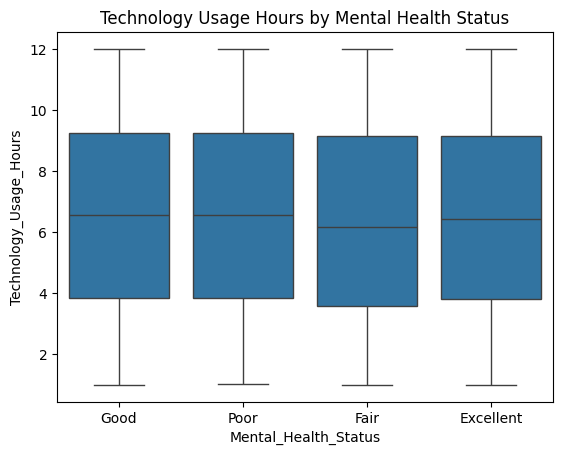

In [9]:
sns.boxplot(x='Mental_Health_Status', y='Technology_Usage_Hours', data=df)
plt.title('Technology Usage Hours by Mental Health Status')
plt.show()

In [10]:
mean_diff = group_poor.mean() - group_good.mean()
std_err = stats.sem(group_poor) + stats.sem(group_good)
ci = stats.t.interval(0.95, df=len(group_good) + len(group_poor) - 2, loc=mean_diff, scale=std_err)

print(f"95% Confidence Interval for the difference in technology usage hours: {ci[0]:.4f} to {ci[1]:.4f}")

95% Confidence Interval for the difference in technology usage hours: -0.2142 to 0.2818
